In [1]:
# ! pip install imageio
# ! pip install matplotlib
# ! pip install celluloid
# ! conda install ffmpeg

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import imageio
import matplotlib.pyplot as plt

from celluloid import Camera  # 电影

In [3]:
class GCN(nn.Module) :


    def __init__(self, A, in_channels, out_channels) :

        super(GCN, self).__init__()

        self.A_hat = A + torch.eye(A.size(0))  # identity matrix
        self.D     = torch.diag(torch.sum(A, 1))
        self.D     = self.D.inverse().sqrt()
        self.A_hat = torch.mm(torch.mm(self.D, self.A_hat), self.D)
        # 随机张量生成，参数矩阵，可以实现特征降维
        self.W     = nn.Parameter(torch.rand(in_channels, out_channels))


    def forward(self, X) :
        out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))

        return out

In [4]:
class Model(torch.nn.Module) :


    def __init__(self, A, nfeat, nhid, nout) :

        super(Model, self).__init__()

        self.GCN1 = GCN(A, nfeat, nhid)  # init
        self.GCN2 = GCN(A, nhid, nout)  # init


    def forward(self, X) :

        H = self.GCN1(X)
        O = self.GCN2(H)

        return O

In [5]:
# karate club
A = torch.Tensor([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
                  [1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                  [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                  [1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
                  [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                  [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                  [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                  [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                  [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
                  [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1],
                  [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1],
                  [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                  [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
                  [0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],
                  [0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0]])
# 34 x 34
# print(sum(sum(A - A.transpose(0, 1))))

In [6]:
# print(A.size(0))  # 行数
X = torch.eye(A.size(0))  # feature matrix (one-hot)

# whats the rule
Y = torch.tensor(
    [[[ 1,  2,  3,  4],
      [ 5,  6,  7,  8],
      [ 9, 10, 11, 12]],

     [[13, 14, 15, 16],
      [17, 18, 19, 20],
      [21, 22, 23, 24]]])
# print(Y.shape)  # 2 x 3 x 4
# print(Y.size(0))  # 2
# 第X个方括号里有多少

In [7]:
# 模型初始参数随机
model = Model(A, X.size(1), 10, 2)  # 输入： 34 x 10 x 2
# print(model(X))  # 输出： 34 x 2

# 半监督：头尾节点类别已知，其它节点类别未知
target = torch.tensor(
    [0 ,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,
     -1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 1])

0
Cross Entropy Loss: = 0.835663914680481
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Cross Entropy Loss: = 0.33799004554748535
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Cross Entropy Loss: = 0.19787856936454773
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
Cross Entropy Loss: = 0.11052297055721283
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Cross Entropy Loss: = 0.0691356211900711
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
Cross Entropy Loss: = 0.047882579267024994
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
Cross Entropy Loss: = 0.035761758685112
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
Cross Entropy Loss: = 0.028149519115686417
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
Cross Entropy Loss: = 0.022998802363872528
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
Cross Entr

MovieWriter ffmpeg unavailable; using Pillow instead.


659
660
Cross Entropy Loss: = 0.0033004567958414555
661
662
663
664
665


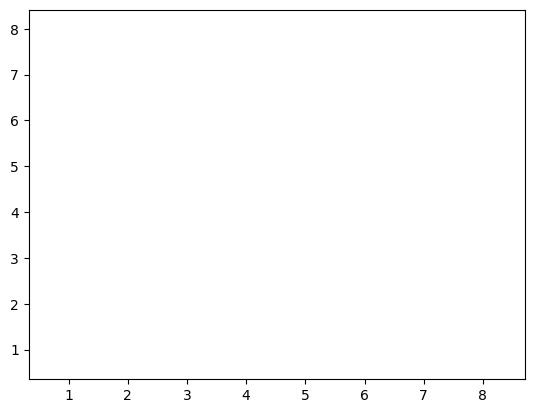

In [8]:
# loss setup
criterion = torch.nn.CrossEntropyLoss(ignore_index=-1)  # label=-1的样本对不参与计算
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# loss = criterion(model(X), target)  # 34x2 与 34x1 怎么做loss?
# print(loss)


# fig setup
fig = plt.figure()
camera = Camera(fig)


for i in range(666) :  # 每次从头训练

    # 参数优化的标准流程
    optimizer.zero_grad()  # 清空优化器中的梯度
    l = model(X)  # X始终不变，参数次次变化，l变化
    loss = criterion(l, target)
    loss.backward()
    optimizer.step()  # 优化参数

    # 记录每一次中间结果
    plt.scatter(l.detach().numpy()[:, 0], l.detach().numpy()[:, 1], 
                c=[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 
                   0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # c=color?

    # 点打标签
    for j in range(l.shape[0]) :
        text_plot = plt.text( l[j, 0], l[j, 1], str(j+1) )

    # fig snap
    camera.snap()

    print(i)
    # record
    if i%20 == 0 :
        print("Cross Entropy Loss: =", loss.item())


# gif saved
animation = camera.animate(blit=False, interval=150)
animation.save('./train_karate_animation.gif', writer='ffmpeg', fps=60)